# COVID-19 Ensemble Model Interactive Plotting Application

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import numpy as np
import random
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display, HTML
import pickle

display(HTML(data="""
<style>
    div#notebook-container    { width: 75%; }
    div#notebook-container    { height: 75%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 85%; }
</style>
"""))

sns.set()
plt.rcParams["figure.figsize"] = (20,10)

%matplotlib notebook

In [2]:
def load_data(filename):
    infile = open(filename, 'rb')
    return pickle.load(infile)

In [3]:
stats_dict = load_data('stats_dict')
properties_dict = load_data('properties_dict')

In [4]:
def getKeyWithID(in_dict, in_id, in_value):
    for key in in_dict:
        if properties_dict['results'][key] == {in_id: in_value}:
            print(key)
            
#getKeyWithID(properties_dict['results'], 'id', 'I_C')

## Plotting Multiple Statistics and Results from an Ensemble
The interactive plot below allows for multiple statistics and results from each of the ensemble model runs to be plotted concurrently. Additionally, the mean can be plotted against the best fit from the 1000 model runs, to provide insight into the viability of the averaged (mean) result mirroring smaller scale in-situ results.
- Description:
    - Ensemble
        - Each ensemble is comprised of 1000 model runs. The maximum behavioral modifier signal is the variable the distinguishes each ensemble. A lower max behavioral modifier indicates at what number of confirmed infectious cases the population is most strict about person-to-person contact.
    - Results
        - Each of the 1000 models from any given ensemble produces 15 different results for every day of the duration of the model run (180 days in this case). Each of the 1000 models has different initial conditions, as sampled from the earlier calculated probability distributions. Additionally, the daily behavioral modifier can be plotted. The daily behavioral modification is a function of the ensemble's maximum - as described above - and are correlated with the confirmed infectious results.
    - Calculations
        - Count: Number of models
        - Mean: Average of all model results
        - Std: Standard deviation of all results
        - Min/Max: Minimum and maximum value of all results
        - 5%/10%/50%/90%95%: Percentiles of all results
        - Best fit: The model results with the smallest RMSE compared to the mean

<IPython.core.display.Javascript object>


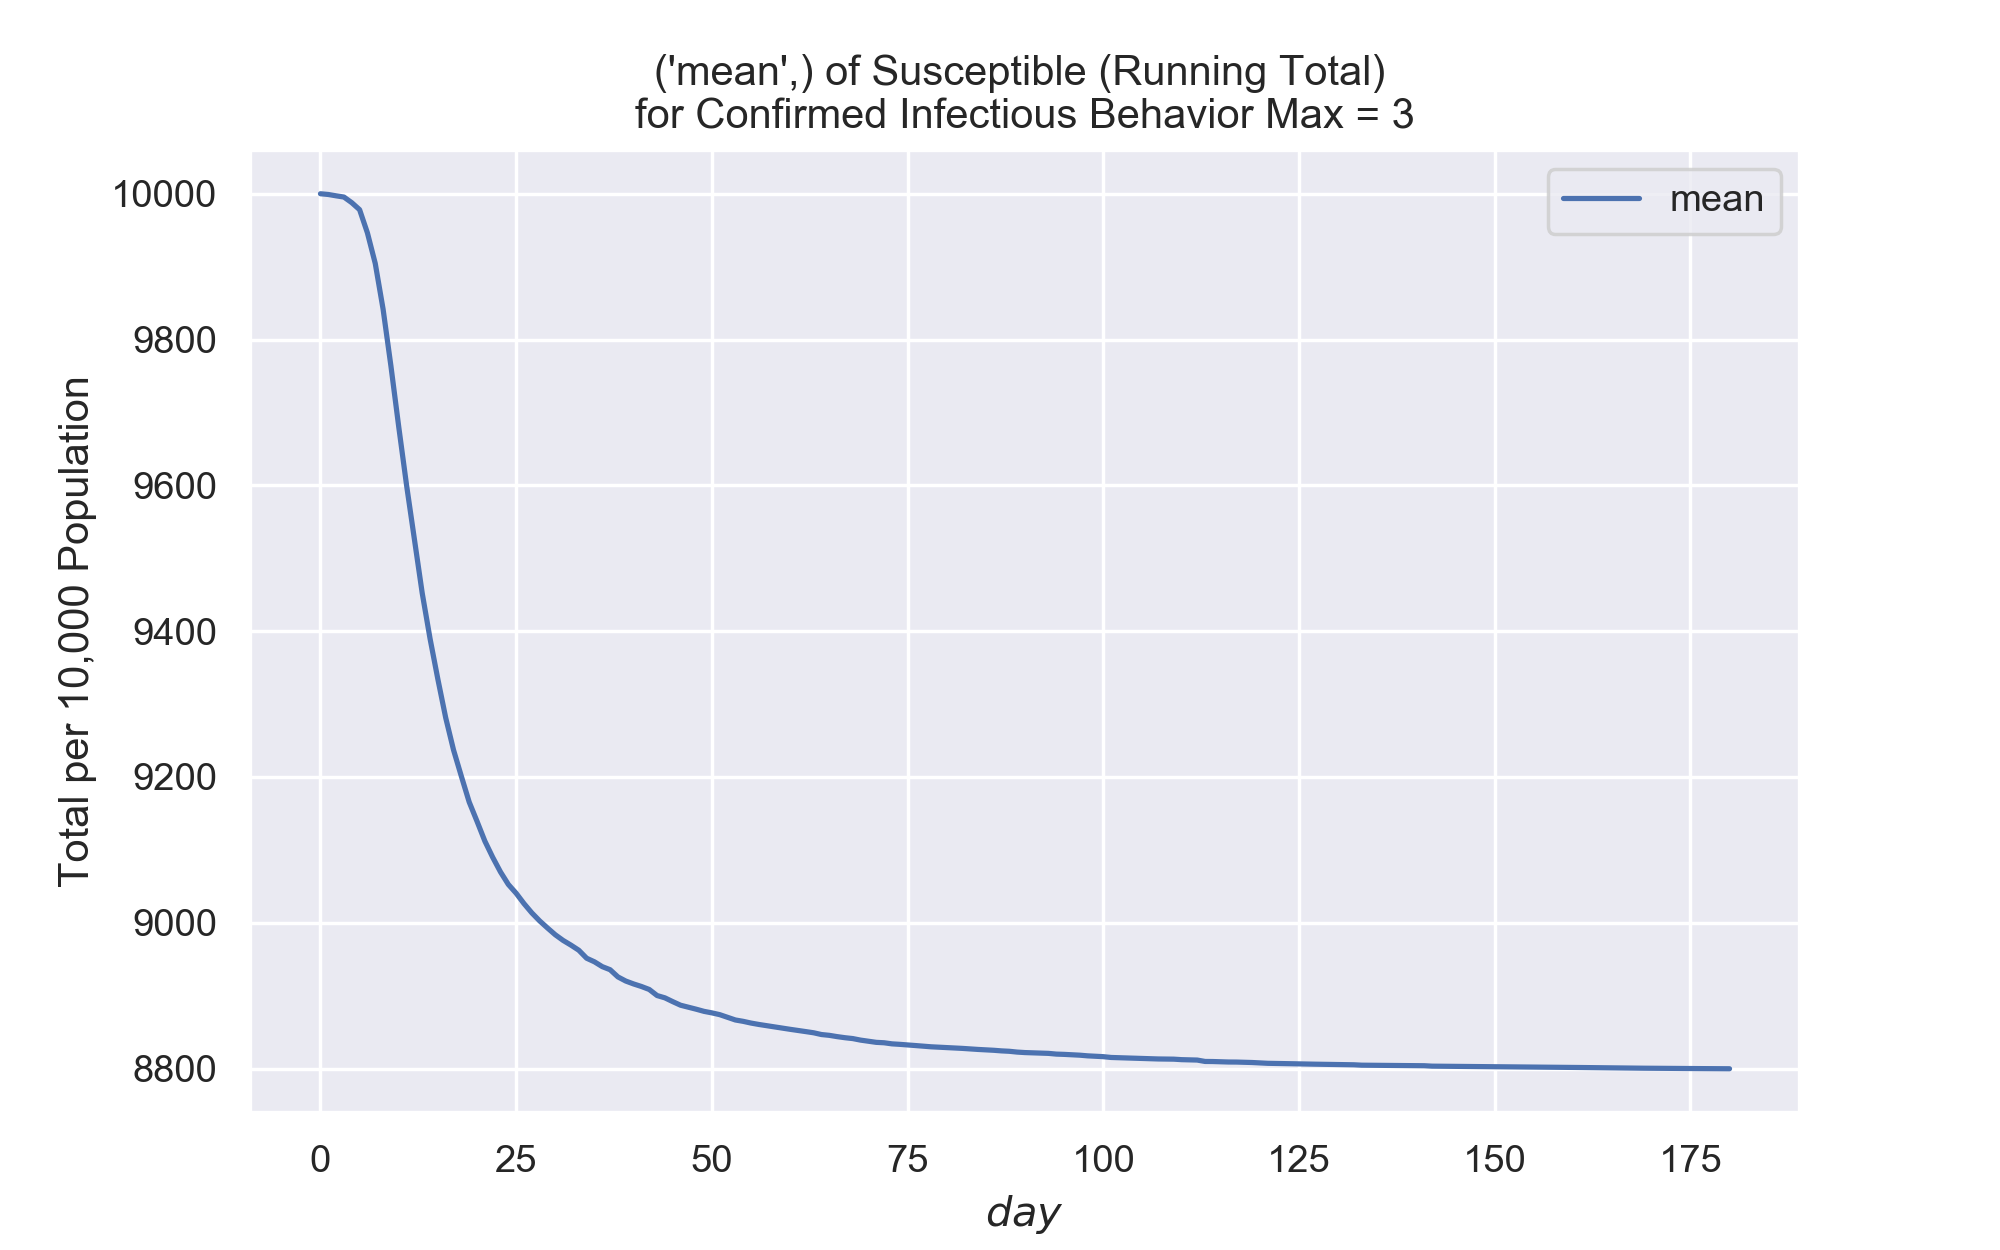

interactive(children=(Dropdown(description='Ensemble', options=('Confirmed Infectious Behavior Max = 3', 'Conf…

In [5]:
fig, ax = plt.subplots(1, figsize=(8,5))

def update_plot(input_1, input_2, input_3):

    ax.clear()
        
    for inp in input_3:
        input_1a = properties_dict['Model Sets'][input_1]['id']
        input_2a = properties_dict['results'][input_2]['id']

        y = stats_dict[input_2a][input_1a][inp]

        lgnd = f'{input_3} of\n{input_1}'
        ax.set_title(f'{input_3} of {input_2} \nfor {input_1}')
        ax.set_xlabel('$day$')
        ax.set_ylabel('Total per 10,000 Population')
        lgnd_set = plt.gca().get_legend_handles_labels()[1]
        ax.plot(y, label= inp if inp not in lgnd_set else '')
        ax.legend()
        plt.show()

beh_mod_wid = widgets.Dropdown(options=properties_dict['Model Sets'].keys(), value=list(properties_dict['Model Sets'])[0], description='Ensemble')
result_wid = widgets.Dropdown(options=properties_dict['results'].keys(), value=list(properties_dict['results'])[0], description='Results')
stat_wid = widgets.SelectMultiple(options=stats_dict['S']['conf_trigger_5'].keys(), value=['mean'], description='Calculations')

widgets.interactive(update_plot, input_1=beh_mod_wid, input_2=result_wid, input_3=stat_wid)

## Simultaneous Plotting of Multiple Ensemble Results
The interactive plot below allows for  simultaneous visual comparison between the results and statistics from any combination of the ensemble model runs. The descriptions of each selection are the same as the previous plot.

<IPython.core.display.Javascript object>


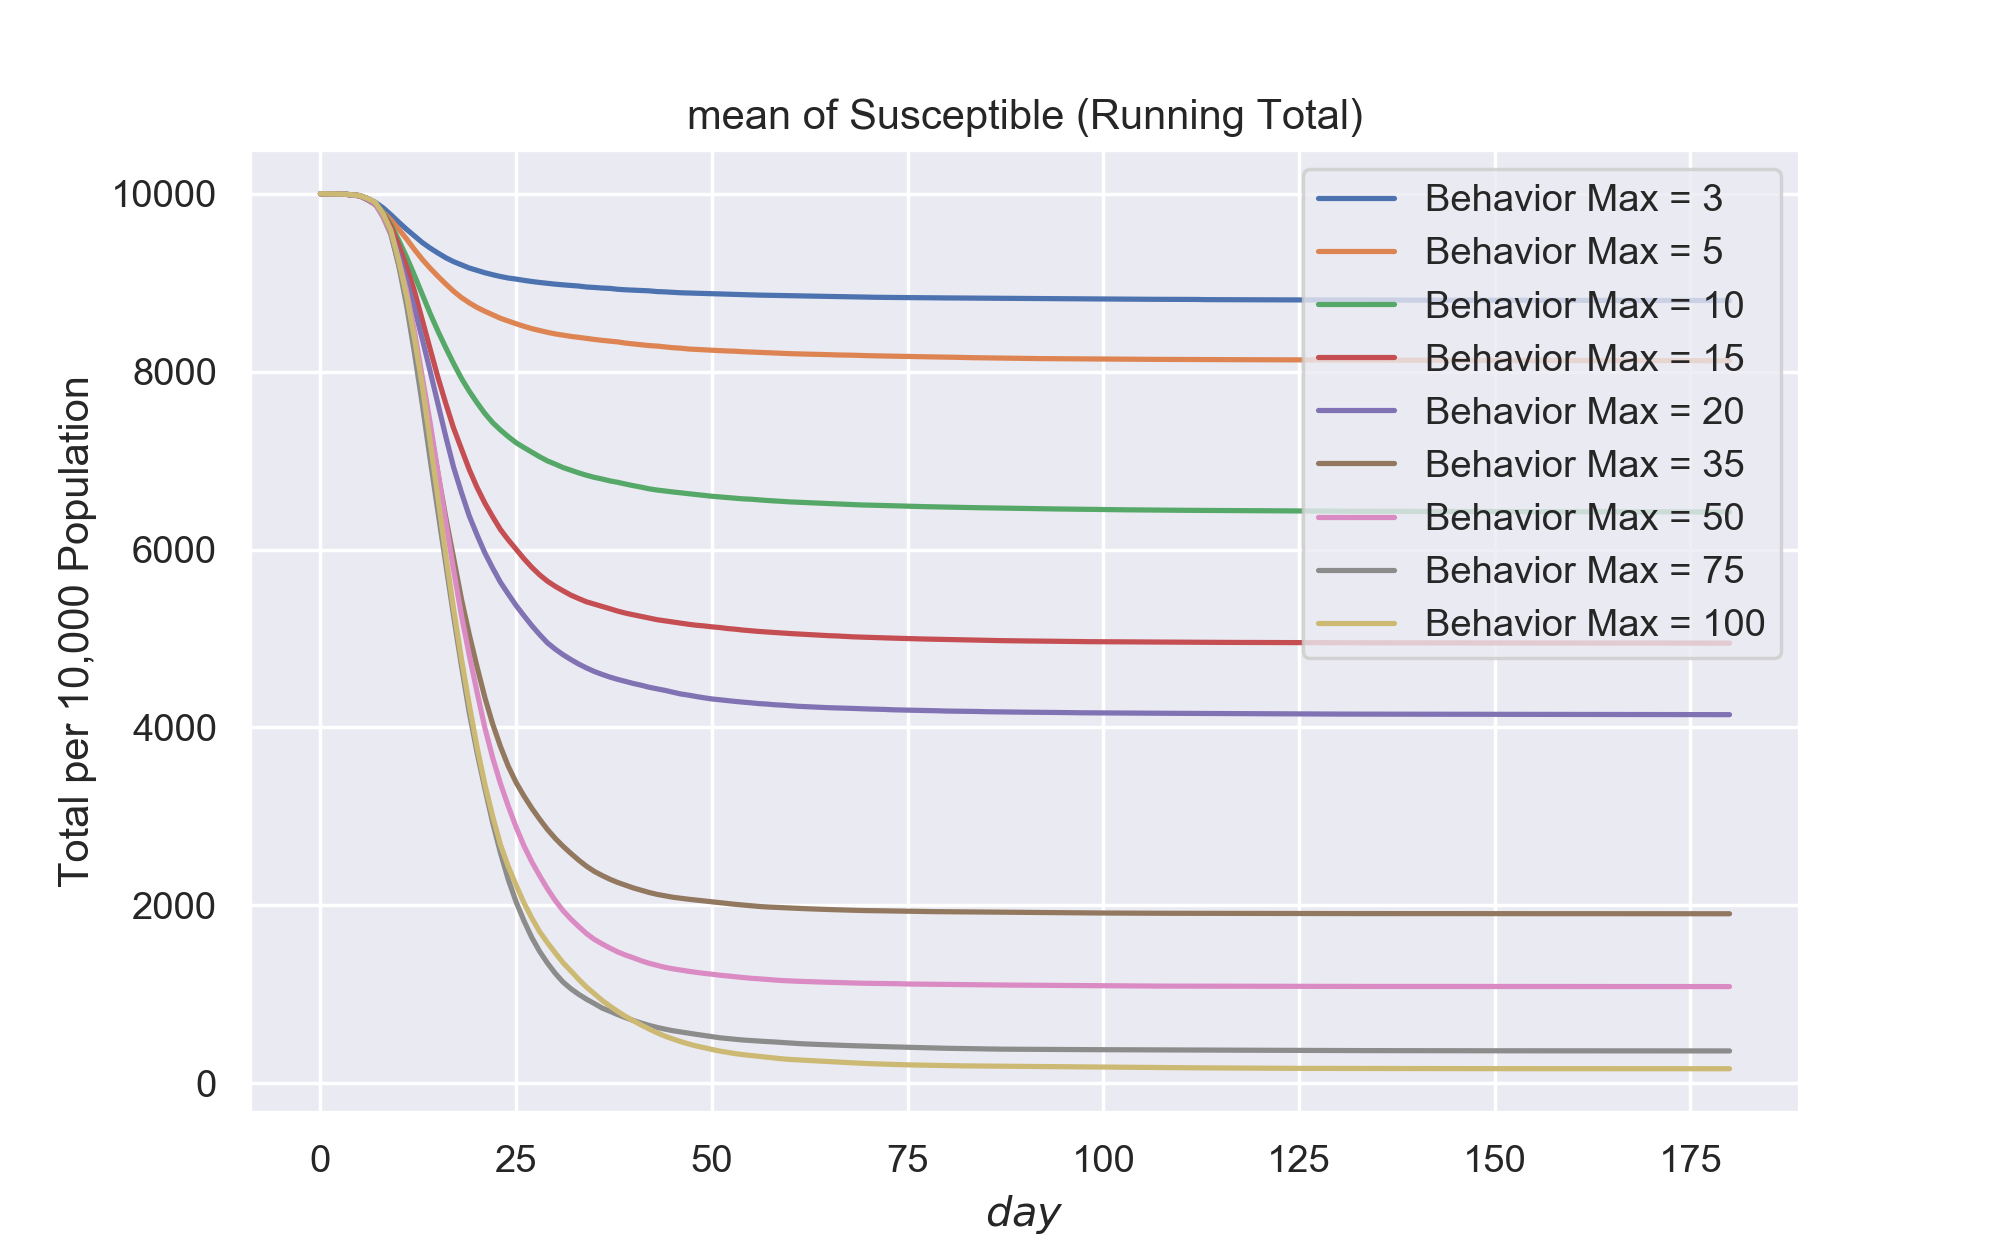

interactive(children=(SelectMultiple(description='Model Set', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('Con…

In [8]:
fig, bx = plt.subplots(1, figsize=(8,5))

def update_plot_2(input_1, input_2, input_3):
    
    bx.clear()
    for inp in input_1:
        
        inpa = properties_dict['Model Sets'][inp]['id']
        input_2a = properties_dict['results'][input_2]['id']
        
        y = stats_dict[input_2a][inpa][input_3]
               
        bx.set_title(f'{input_3} of {input_2}')
        lgnd = f'{input_3} of\n{input_2}'
        bx.set_xlabel('$day$')
        bx.set_ylabel('Total per 10,000 Population')
        lgnd_set = plt.gca().get_legend_handles_labels()[1]
        bx.plot(y, label= inp[21:] if inp not in lgnd_set else '')
        bx.legend(loc=1)

        plt.show()

beh_mod_wid = widgets.SelectMultiple(options=properties_dict['Model Sets'].keys(), value=list(properties_dict['Model Sets']), description='Model Set')
result_wid = widgets.ToggleButtons(options=properties_dict['results'].keys(), disabled=False, description='Result Type', button_style='success')
stat_wid = widgets.ToggleButtons(options=stats_dict['S']['conf_trigger_5'].keys(), value='mean',
                                 disabled=False, description='Stat Type', button_style='info')


widgets.interactive(update_plot_2, input_1=beh_mod_wid, input_2=result_wid, input_3=stat_wid)